In [1]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
def markdownTable(df, *column_names):
    if not column_names:
        column_names = df.columns.tolist()
    table_markdown = "| " + " | ".join(column_names) + " |\n"
    table_markdown += "| " + " | ".join(["---"] * len(column_names)) + " |\n"
    for index, row in df.iterrows():
        row_data = [str(row[col]) for col in column_names]
        table_markdown += "| " + " | ".join(row_data) + " |\n"
    return table_markdown


def markdownSeries(series, col1=None, col2=None):
    if not col1:
        col1 = series.index.name if series.index.name else "Index"
    if not col2:
        col2 = series.name if series.name else "Value"
    table_markdown = f"| {col1} | {col2} |\n|---|---|\n"
    for index, value in series.items():
        table_markdown += f"| {index} | {value} |\n"
    return table_markdown


pd.DataFrame.markdownTable = markdownTable
pd.Series.markdownTable = markdownSeries

In [3]:
%%timeit -n 100

# Create a hypothetical dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 45],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Salary': [50000, 60000, 70000, 80000, 90000],
    'Department': ['HR', 'Finance', 'IT', 'Marketing', 'Operations']
}
df = pd.DataFrame(data)

# Create a new column 'Bonus' based on complex calculation
df['Bonus'] = df['Salary'] * 0.1 + df['Age'] * 0.05

# Perform some complex operations on the DataFrame
# For example, let's filter the DataFrame for individuals with Age > 30 and Salary > 60000
filtered_df = df[(df['Age'] > 30) & (df['Salary'] > 60000)]

# Convert the filtered DataFrame to a markdown table
filtered_markdown_table = markdownTable(filtered_df)
print("Filtered DataFrame as Markdown Table:")
print(filtered_markdown_table)

# Calculate the average Bonus for each gender
avg_bonus_by_gender = df.groupby('Gender')['Bonus'].mean()

# Convert the Series to a markdown table
avg_bonus_markdown = markdownSeries(avg_bonus_by_gender, col1='Gender', col2='Average Bonus')
print("\nAverage Bonus by Gender as Markdown Table:")
print(avg_bonus_markdown)

Filtered DataFrame as Markdown Table:
| Name | Age | Gender | Salary | Department | Bonus |
| --- | --- | --- | --- | --- | --- |
| Charlie | 35 | Male | 70000 | IT | 7001.75 |
| David | 40 | Male | 80000 | Marketing | 8002.0 |
| Eve | 45 | Female | 90000 | Operations | 9002.25 |


Average Bonus by Gender as Markdown Table:
| Gender | Average Bonus |
|---|---|
| Female | 7001.75 |
| Male | 7001.75 |

Filtered DataFrame as Markdown Table:
| Name | Age | Gender | Salary | Department | Bonus |
| --- | --- | --- | --- | --- | --- |
| Charlie | 35 | Male | 70000 | IT | 7001.75 |
| David | 40 | Male | 80000 | Marketing | 8002.0 |
| Eve | 45 | Female | 90000 | Operations | 9002.25 |


Average Bonus by Gender as Markdown Table:
| Gender | Average Bonus |
|---|---|
| Female | 7001.75 |
| Male | 7001.75 |

Filtered DataFrame as Markdown Table:
| Name | Age | Gender | Salary | Department | Bonus |
| --- | --- | --- | --- | --- | --- |
| Charlie | 35 | Male | 70000 | IT | 7001.75 |
| David | 40 | 

In [4]:
%%timeit -n 100

# Create a hypothetical dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 45],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Salary': [50000, 60000, 70000, 80000, 90000],
    'Department': ['HR', 'Finance', 'IT', 'Marketing', 'Operations']
}
df = pd.DataFrame(data)

# Create a new column 'Bonus' based on complex calculation
df['Bonus'] = df['Salary'] * 0.1 + df['Age'] * 0.05

# Perform some complex operations on the DataFrame
# For example, let's filter the DataFrame for individuals with Age > 30 and Salary > 60000
filtered_df = df[(df['Age'] > 30) & (df['Salary'] > 60000)]

# Convert the filtered DataFrame to a markdown table
print("Filtered DataFrame as Markdown Table:")
print(filtered_df.to_markdown())

# Calculate the average Bonus for each gender
avg_bonus_by_gender = df.groupby('Gender')['Bonus'].mean()

print(avg_bonus_by_gender.to_markdown())



Filtered DataFrame as Markdown Table:
|    | Name    |   Age | Gender   |   Salary | Department   |   Bonus |
|---:|:--------|------:|:---------|---------:|:-------------|--------:|
|  2 | Charlie |    35 | Male     |    70000 | IT           | 7001.75 |
|  3 | David   |    40 | Male     |    80000 | Marketing    | 8002    |
|  4 | Eve     |    45 | Female   |    90000 | Operations   | 9002.25 |
| Gender   |   Bonus |
|:---------|--------:|
| Female   | 7001.75 |
| Male     | 7001.75 |
Filtered DataFrame as Markdown Table:
|    | Name    |   Age | Gender   |   Salary | Department   |   Bonus |
|---:|:--------|------:|:---------|---------:|:-------------|--------:|
|  2 | Charlie |    35 | Male     |    70000 | IT           | 7001.75 |
|  3 | David   |    40 | Male     |    80000 | Marketing    | 8002    |
|  4 | Eve     |    45 | Female   |    90000 | Operations   | 9002.25 |
| Gender   |   Bonus |
|:---------|--------:|
| Female   | 7001.75 |
| Male     | 7001.75 |
Filtered DataFrame a

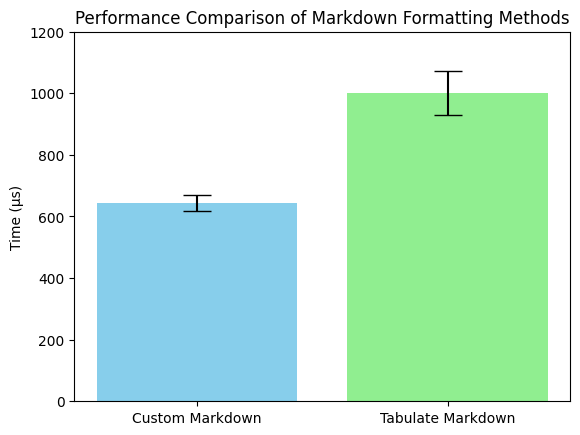

In [6]:
# data from %%timeit runs
labels = ['Custom Markdown', 'Tabulate Markdown']
means = [643, 1000]
std_devs = [25.9, 70.9]

fig, ax = plt.subplots()
ax.bar(labels, means, yerr=std_devs, capsize=10, color=['skyblue', 'lightgreen'])

ax.set_ylabel('Time (μs)')
ax.set_title('Performance Comparison of Markdown Formatting Methods')
ax.set_ylim(0, 1200)  # Set y-axis limit for better visualization

plt.show()